# Author : Etaboina Mallikarjun Yadav

# Task 2 Unsupervised Learning:
From the given ‘Iris’ dataset, predicting the optimum number of clusters and represent it visually.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
from sklearn import tree

In [15]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [17]:
df=pd.read_csv("C:/Users/dell/Downloads/Iris.csv")

In [18]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [20]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [23]:
df['Species'].nunique()

3

In [24]:
df['Species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

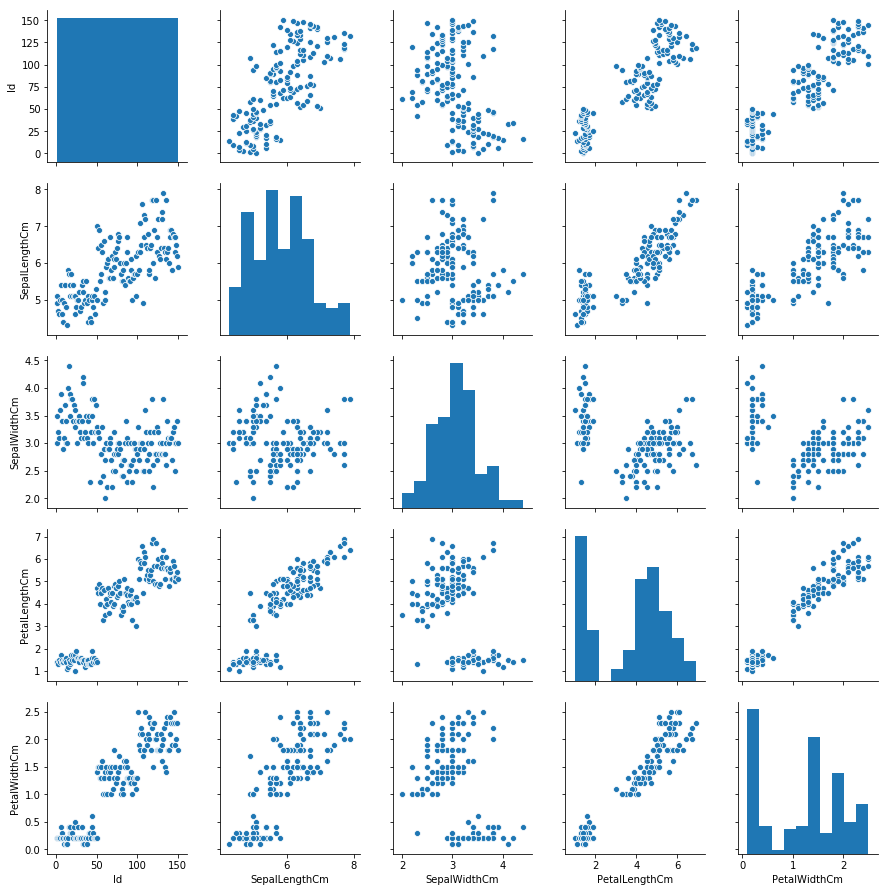

In [26]:
sns.pairplot(df)

In [27]:
x=df.iloc[:,0:4].values
y=df.iloc[:,4]

In [28]:
from sklearn.cluster import KMeans

Text(0, 0.5, 'wcss')

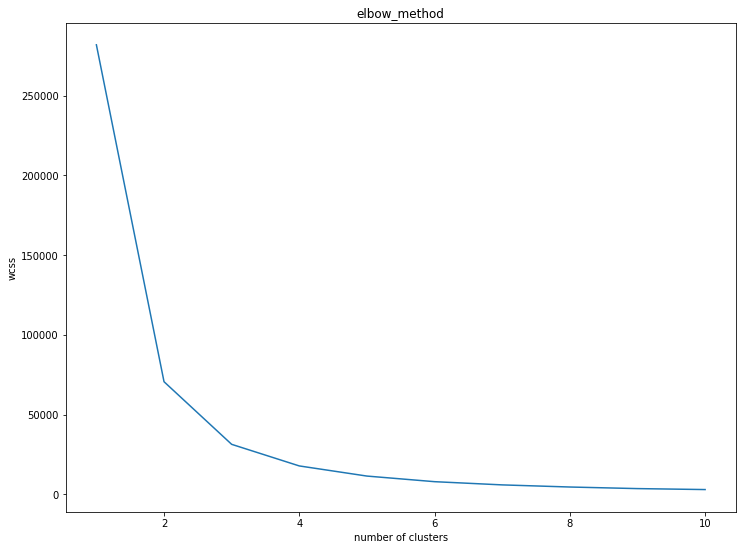

In [30]:
plt.figure(figsize=(12,9))
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init= 'k-means++',random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title("elbow_method")
plt.xlabel("number of clusters")
plt.ylabel("wcss")

In [31]:
print("from the elbow method we can see number clusters 3")

from the elbow method we can see number clusters 3


In [34]:
kmeans=KMeans(n_clusters=3,init='k-means++', random_state=42)
y_kmeans=kmeans.fit_predict(x)

In [35]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [37]:
kmeans.cluster_centers_

array([[125.5  ,   6.588,   2.974,   5.552],
       [ 25.5  ,   5.006,   3.418,   1.464],
       [ 75.5  ,   5.936,   2.77 ,   4.26 ]])

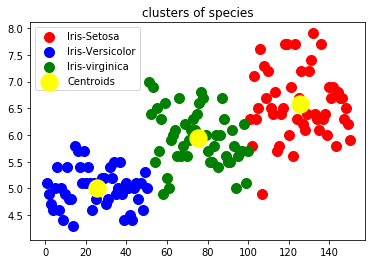

In [49]:
plt.scatter(x[y_kmeans == 0,0],x[y_kmeans == 0,1], s=100 , c='red', label = 'Iris-Setosa')
plt.scatter(x[y_kmeans == 1,0],x[y_kmeans == 1,1], s=100 , c='blue', label = 'Iris-Versicolor')
plt.scatter(x[y_kmeans == 2,0],x[y_kmeans == 2,1], s=100 , c='green', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow', label='Centroids')
plt.title("clusters of species")
plt.legend()
